## Install/Import

In [ ]:
!apt update
!apt install enchant --fix-missing
!apt install -qq enchant
!pip install protobuf==3.19.*
!pip install pyenchant
!apt install python-numpy libicu-dev
!apt install python3-icu
!pip3 install pyicu
!pip3 install pycld2
!pip3 install polyglot
!pip3 install morfessor
!pip3 install metaphone
!pip install wordfreq
!pip install fuzzy 
!pip install collections
!pip install condacolab
!pip install dalle-mini
!pip install --upgrade diffusers scipy
!pip install accelerate
!pip uninstall transformers -y
!pip install transformers==4.25.1
!pip install git+https://github.com/patil-suraj/vqgan-jax.git

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Get:4 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:11 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/ubuntu focal-updates

In [ ]:
import condacolab
condacolab.install()
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import nltk
from nltk.corpus import cmudict
from nltk.corpus import words
from torch import autocast
from diffusers.pipelines.stable_diffusion import safety_checker
from diffusers import StableDiffusionPipeline
import pandas as pd
from metaphone import doublemetaphone
from huggingface_hub import notebook_login 
import nltk
from wordfreq import word_frequency
import re
import enchant
import statistics
from statistics import mean
from polyglot.downloader import downloader
from wordfreq import zipf_frequency
from polyglot.text import Text, Word
from collections import Counter
import statistics
import torch
import fuzzy
from google.colab import drive
import jax
from dalle_mini import DalleBart, DalleBartProcessor
from vqgan_jax.modeling_flax_vqgan import VQModel
from transformers import CLIPProcessor, FlaxCLIPModel
from flax.jax_utils import replicate
import jax.numpy as jnp
from functools import partial
import random
from flax.training.common_utils import shard_prng_key
import numpy as np
from PIL import Image
from tqdm.notebook import trange
import cv2
from google.colab.patches import cv2_imshow # for image display
from dalle_mini import DalleBartProcessor
drive.mount('/content/gdrive')
nltk.download('omw-1.4')
nltk.download('cmudict')
nltk.download('punkt')
nltk.download('brown')
nltk.download("word")
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
from nltk.corpus import wordnet as wn

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:41
🔁 Restarting kernel...
Mounted at /content/gdrive


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Error loading word: Package 'word' not found in index
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
!polyglot download embeddings2.en ner2.en

[polyglot_data] Downloading package embeddings2.en to
[polyglot_data]     /root/polyglot_data...
[polyglot_data]   Package embeddings2.en is already up-to-date!
[polyglot_data] Downloading package ner2.en to /root/polyglot_data...
[polyglot_data]   Package ner2.en is already up-to-date!


In [ ]:
from huggingface_hub import notebook_login 
notebook_login()
model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


## Puns generation

In [ ]:
def tokenizer(word):
    ''' This function takes in a single word as input and returns a list of all possible substrings of the word that have a length of at least 2 characters. 
  The substring generation process uses nested for loops to iterate through all possible starting and ending indices of the substring within the original word. 
  The resulting list of substrings is then filtered to remove any duplicates and substrings that are shorter than 2 characters.'''

    tokens = []
    f = []
    i = 1
    j = 1
    for i in range(len(word)):
        for j in range(len(word)):
            wordmix = word[j:]
            tokens.append(wordmix[:i])
    tokens = list(set(tokens))

    for t in tokens:
      if len(t) >= 2:
        f.append(t)

    return f

def morpho(sub_words):
  '''This function takes in a list of sub-words as input and returns a new list of words by appending each character from a-z to each of the sub-words. 
The function uses map() to generate a list of characters from a-z and iterates through each of these characters, adding them to each of the sub-words. 
It then appends the resulting new word to the list_words.'''
  list_words = []
  for x in sub_words:
    for y in list(map(chr,range(97,123))):
      z = x + y 
      list_words.append(z)
  return list_words

def word_in_english(sub_words):
  '''This function takes in a list of sub-words as input and returns a new list of words that are present in the English language. 
It uses the words.words() function from the Natural Language Toolkit (NLTK) library to check if each sub-word is present in the English language. 
It then appends the sub-word to the list_ if it is present in the English language and has a length greater than 2 characters.'''
  list_ = []
  
  for x,y in enumerate(sub_words):
    if y in words.words() and len(y)>2:
      list_.append(y)
  return list_

def remPlacement(mot,submot,newmot): 
    '''This a function that takes in a word, a substring within that word, and a replacement string, and returns the original word with 
    the substring replaced by the replacement string.'''
    mot = mot.replace(submot, newmot)
    return mot

def substract(a, b):                              
    return "".join(a.rsplit(b))

def is_str(obj):
  if type(obj)==str:
    return True

def exist(df, index, cat):
  """The function takes: a dataframe, an index and a category (column of the df)
  If there is an object of type str in the corresponding cell, it returns the word."""
  item = df.iloc[index][cat]
  if is_str(item):
    return item

def construct_df(sub_words):
  '''This function starts by creating an empty dataframe with the specified columns. It then populates the 'word' 
  column with the sub_words. It uses the WordNet library to get synonyms, antonyms, hypernyms, and hyponyms for each word in the sub_words list. 
  It iterates through each word in the sub_words list and for each word it finds synonyms, antonyms, hypernyms, and hyponyms. The values obtained 
  are then stored in the dataframe at the corresponding index for each word. 
  If there is an IndexError, the loop will continue to the next word.
  It returns the final dataframe.'''
  df = pd.DataFrame(columns=['word','syn','ant','hyper','hypo'])
  df['word']=sub_words
  for x, y in enumerate(sub_words):
      for synset in wn.synsets(y):
          ant_ = []
          syn_= []
          for l in synset.lemmas():
              syn_.append(l.name())
              if l.antonyms():
                  ant_.append(l.antonyms()[0].name())
      try:
        My_sysn = wn.synsets(y)[0] 
        hyper_ = [x.lemma_names() for x in My_sysn.hypernyms()]
        hypo_ = [x.lemma_names() for x in My_sysn.hyponyms()]
      except:
        continue
      syn_ = [item for item in syn_ ]
      try:
        df.iloc[x]['hypo']=hypo_[0][0]
        df.iloc[x]['hyper']=hyper_[0][0]
        if syn_[0]==y:
          df.iloc[x]['syn']=syn_[1]
        else:
          df.iloc[x]['syn']=syn_[0]
        df.iloc[x]['ant']=ant_[0]
      except IndexError:
        continue
  return df

def punalogy(semantic_link, index, cat, sub_words, word, df):
    '''The function appears to use these arguments to generate a pun analogy by replacing a word in a given sentence with a related word.
  The function uses the selected word from sub_words and its related word from df to generate a pun analogy by replacing a word in word with the 
  selected related word. It returns the pun analogy as a string.'''
    a  = sub_words[index]
    b = word.replace(" ", "_")
    c = df.iloc[index][cat]
    d = remPlacement(b,a,c.replace("_", " "))
    analogy = str(a) +' is to ' + str(b) + ' as '+ str(c).replace("_", " ") + ' is to '+ str(d)
    return analogy

def punalogy2(semantic_link, index, cat, sub_words, word, df):
  '''The difference between "punalogy" and "punalogy2" functions is that this functions returns a tuple containing the replaced words b,d where as punalogy only returns the analogy string.'''
  a  = sub_words[index]
  b = word.replace(" ", "_")
  c = df.iloc[index][cat]
  b, d = remPlacement(b,a,c.replace("_", " "))
  analogy = str(a) +' is to ' + str(b) + ' as '+ str(c).replace("_", " ") + ' is to '+ str(d)
  return analogy

def get_word(df, subwords, word):
  '''Takes in a dataframe (df), a list of subwords, and a word as input. Creates a list of semantic categories (cat_list) and an empty list to store the analogies. 
  Then loops through each subword and each semantic category, and checks if a semantic link exists between the subword and the category using the "exist" function. 
  If a semantic link exists, it creates an analogy using the "punalogy" function and adds it to the list of analogies. Finally, it returns a list of the analogies with underscores replaced by spaces.'''
  cat_list =['syn','ant','hyper','hypo']
  analogies = []
  for index, sub in enumerate(subwords):
    for i, cat in enumerate(cat_list):
      semantic_link = exist(df, index, cat)
      if is_str(semantic_link):
        analogy = punalogy(semantic_link, index, cat, subwords, word, df)
        analogies.append(analogy)
      else:
        continue
  return [w.replace('_', ' ') for ind, w in enumerate(analogies)]

def get_word2(df, subwords, word):
  cat_list =['syn','ant','hyper','hypo']
  analogies = []
  for index, sub in enumerate(subwords):
    for i, cat in enumerate(cat_list):
      semantic_link = exist(df, index, cat)
      if is_str(semantic_link):
        try:
          analogy = punalogy2(semantic_link, index, cat, subwords, word, df)
          analogies.append(analogy)
        except:
          continue
      else:
        continue
  return analogies

def get_punalogy(word):
  '''This function takes in a word as input and returns a list of word analogies and a dataframe containing the word, its synonym, antonym, hypernym, and hyponym.
  It also checks if any analogies are possible and returns a message if not.'''
  subwords = word_in_english(tokenizer(word))
  subwords2 = word_in_english(morpho(tokenizer(word)))
  df = construct_df(subwords)
  df2 = construct_df(subwords2)
  analogies = get_word(df, subwords, word)
  analogies2 = get_word2(df2, subwords2, word)
  liste_ = [*analogies, *analogies2]
  if not analogies:
    return "no analogy is possible", None
  else:
    return liste_, df

## Selection

In [ ]:
def selection_process(analogy):
  """ This function selects a punalogy in a list
  Input: punalogy (str) list, 
  Output: punalogy selected"""

  def construct_df_analogies(list_punalogy):
    """This function create a dataframe to store all punalogies
    Input: punalogy (str) list
    Output: dataframe"""
    df = pd.DataFrame(columns=['punalogy'])
    df['punalogy']=list_punalogy
    return df

  def frequency_punalogy(punalogy):
    """This function get zipf frequency of each word in punalogy
    input : punalogy (str)
    output : list of frequencies"""
    result = re.search(r"(.*) is to (.*) as (.*) is to (.*)", punalogy)
    a_str = result.group(1)
    b_str = result.group(2)
    c_str = result.group(3)
    elements = [a_str, b_str, c_str]
    word_frequencies = [zipf_frequency(word, "en", wordlist='best') for word in elements]
    return word_frequencies

  def get_frequency(analogy):
    """This function get all frequencies in a list of punalogies, 
    Input: list of punalogies (str),
    output: list of frequencies"""
    word_frequencies = []
    for index,pun  in enumerate(analogy):
      word_freq = frequency_punalogy(pun)
      word_frequencies.append(word_freq)
    return word_frequencies

  def frequency_jokes(punalogy, count):
    """This function get all frequencies of punalogies"""
    result = re.search(r"(.*) is to (.*) as (.*) is to (.*)", punalogy)
    a_str = result.group(1)
    b_str = result.group(2)
    c_str = result.group(3)
    elements = [a_str, b_str, c_str]
    word_frequencies = []
    for ind, elem in enumerate(elements):
      for key, value in count:
        if key == elem:
          word_frequencies.append(value)
    while len(word_frequencies)<3:
      word_frequencies.append(0)
    return word_frequencies


  def joke_dataset(analogy):
    """This function read a dataset of jokes and get the frequency of a word inside
    Input: list of punalogies (str)
    output: list of list of frequencies"""
    df_jokes = pd.read_csv('/content/gdrive/MyDrive/shortjokes.csv') #change this path for your path of shortjokes
    jokes = ' '.join(df_jokes['Joke'].tolist())
    count = Counter(jokes.split()).most_common()
    freq_jokes = []
    for ind, punalogy in enumerate(analogy):
      freq_jokes.append(frequency_jokes(punalogy, count))
    return freq_jokes, count

  #create a dataframe to store all analogies
  df_analogies = construct_df_analogies(analogy)
  #get their frequencies in english and the mean of all words frequencies
  df_analogies['frequency']=get_frequency(analogy)
  df_analogies["mean_frequency"] = df_analogies["frequency"].apply(lambda x: mean(x))
  #get their frequencies in a joke datset and the mean of all words frequencies
  df_analogies['jokes_frequency1'], count = joke_dataset(analogy)
  df_analogies["jokes_frequency1"] = df_analogies["punalogy"].apply(lambda x: frequency_jokes(x, count))
  df_analogies["jokes_frequency_median"] = df_analogies["jokes_frequency1"].apply(lambda x: statistics.median(x))
  #compute the selection score
  df_analogies["selection_score"] = (df_analogies["jokes_frequency_median"] + df_analogies["mean_frequency"]) /2
  #get the punalogy with the higher selection score
  punalogy = df_analogies.loc[df_analogies["selection_score"].idxmax()][0]
  return punalogy


## Memes generation

In [ ]:
DALLE_COMMIT_ID = None
DALLE_MODEL = "dalle-mini/dalle-mini/mini-1:v0"

# VQGAN model
VQGAN_REPO = "dalle-mini/vqgan_imagenet_f16_16384"
VQGAN_COMMIT_ID = "e93a26e7707683d349bf5d5c41c5b0ef69b677a9"

# number of predictions per prompt
n_predictions = 1

# We can customize generation parameters (see https://huggingface.co/blog/how-to-generate)
gen_top_k = None
gen_top_p = None
temperature = None
cond_scale = 10.0

model, params = DalleBart.from_pretrained(
    DALLE_MODEL, revision=DALLE_COMMIT_ID, dtype=jnp.float16, _do_init=False
)

# Load VQGAN
vqgan, vqgan_params = VQModel.from_pretrained(
    VQGAN_REPO, revision=VQGAN_COMMIT_ID, _do_init=False
)
params = replicate(params)
vqgan_params = replicate(vqgan_params)
seed = random.randint(0, 2**32 - 1)
key = jax.random.PRNGKey(seed)

#Code id for the registration : 20f5dc9430711ba49d05250536196072b949f463

wandb: Downloading large artifact mini-1:v0, 1673.43MB. 7 files... 
wandb:   7 of 7 files downloaded.  
Done. 0:0:10.3
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [ ]:
# model inference
@partial(jax.pmap, axis_name="batch", static_broadcasted_argnums=(3, 4, 5, 6))
def p_generate(
    tokenized_prompt, key, params, top_k, top_p, temperature, condition_scale
):
    return model.generate(
        **tokenized_prompt,
        prng_key=key,
        params=params,
        top_k=top_k,
        top_p=top_p,
        temperature=temperature,
        condition_scale=condition_scale,
    )


# decode image
@partial(jax.pmap, axis_name="batch")
def p_decode(indices, params):
    return vqgan.decode_code(indices, params=params)

processor = DalleBartProcessor.from_pretrained(DALLE_MODEL, revision=DALLE_COMMIT_ID)

def sc(self, clip_input, images) :
    return images, [False for i in images]

# edit StableDiffusionSafetyChecker class so that, when called, it just returns the images and an array of True values
safety_checker.StableDiffusionSafetyChecker.forward = sc
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16", use_auth_token=True)
pipe = pipe.to("cuda")

def generate_image_from_prompt_dalle(prompts):
  images = []
  key = jax.random.PRNGKey(seed)
  tokenized_prompts = processor(prompts)
  tokenized_prompt = replicate(tokenized_prompts)
  print(f"Prompts: {prompts}\n")
  images = []
  for i in trange(max(n_predictions // jax.device_count(), 1)):
      # get a new key
      key, subkey = jax.random.split(key)
      # generate images
      encoded_images = p_generate(
          tokenized_prompt,
          shard_prng_key(subkey),
          params,
          gen_top_k,
          gen_top_p,
          temperature,
          cond_scale,
      )
      # remove BOS
      encoded_images = encoded_images.sequences[..., 1:]
      # decode images
      decoded_images = p_decode(encoded_images, vqgan_params)
      decoded_images = decoded_images.clip(0.0, 1.0).reshape((-1, 256, 256, 3))
      for decoded_img in decoded_images:
        img = Image.fromarray(np.asarray(decoded_img * 255, dtype=np.uint8))
        images.append(img)
        print("added image")
  return images
    
def generate_image_from_prompt_stable(prompts):
  images = []
  print(f"Prompts stale: {prompts}\n")
  for x,punalogy in enumerate(prompts):
      image = pipe(punalogy, guidance_scale=7.5).images[0]
      images.append(image.resize((256, 256)))
  return images
    
def resize_and_generate(images):
  cv_images = []
  for x in images : 
    open_cv_image = np.array(x) 
    open_cv_image = open_cv_image[:, :, ::-1].copy() 
    scale_percent = 200 # percent of original size
    width = int(open_cv_image.shape[1] * scale_percent / 100)
    height = int(open_cv_image.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(open_cv_image, dim, interpolation = cv2.INTER_AREA)
    cv_images.append(Image.fromarray(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)))
    
  template = Image.open('/content/gdrive/My Drive/template_meme.png').convert("RGB")
  template.paste(cv_images[0], (150, 200))
  template.paste(cv_images[1], (1000, 200))
  template.paste(cv_images[2], (150, 1050))
  template.paste(cv_images[3], (1000, 1050))
  return template

wandb: Downloading large artifact mini-1:v0, 1673.43MB. 7 files... 
wandb:   7 of 7 files downloaded.  
Done. 0:0:8.0


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

# Apps



analogy= ['Bud is to Buddhist as bud is to buddhist', 'Bud is to Buddhist as flower is to flowerdhist', 'Bud is to Buddhist as rosebud is to rosebuddhist']
Selected = Bud is to Buddhist as flower is to flowerdhist
Prompts stale: ['Bud', 'Buddhist', 'flower']



  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Prompts: ['flowerdhist']



  0%|          | 0/1 [00:00<?, ?it/s]

added image


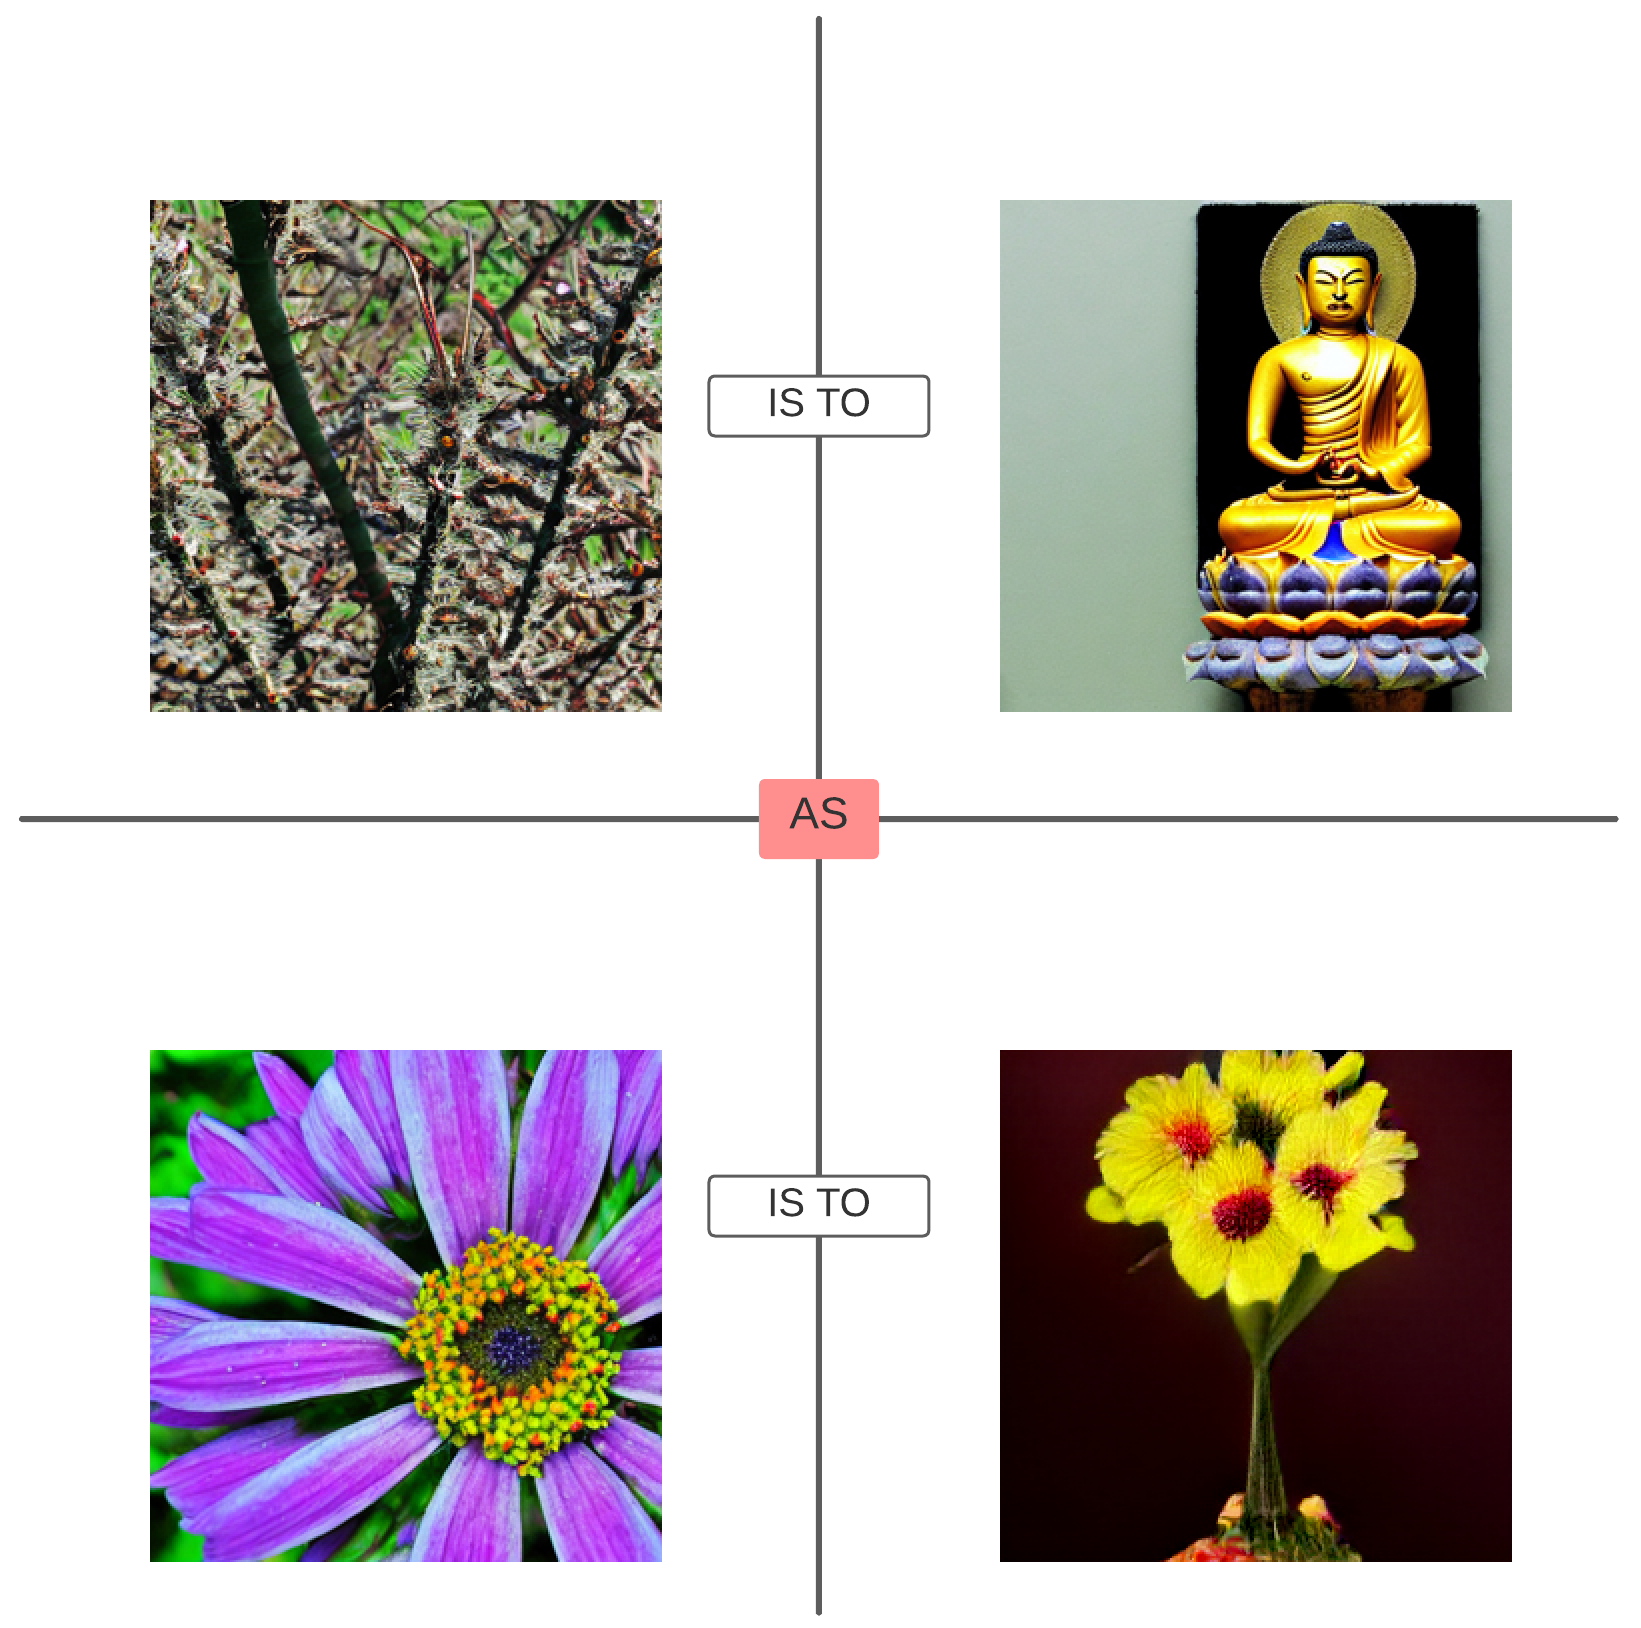

In [ ]:
word = "Buddhist"
analogy, df = get_punalogy(word)
print('\nanalogy=', analogy)

punalogy_selected = selection_process(analogy)
print("Selected = " + punalogy_selected)

result = re.search(r"(.*) is to (.*) as (.*) is to (.*)", punalogy_selected)
a_str = result.group(1)
b_str = result.group(2)
c_str = result.group(3)
d_str = result.group(4)
prompts_dalle = [
    d_str
]

prompts_stable = [
    a_str,b_str,c_str
]

images = generate_image_from_prompt_stable(prompts_stable) + generate_image_from_prompt_dalle(prompts_dalle)

template = resize_and_generate(images)
template